In [1]:
###########
# Imports #
###########

# importing libraries
import matplotlib.pyplot as plt
import copy

# importing algorithms
# from BFGS_multistart import*
# from Stochastic_local_search import*
# from Cuadratic_opt_v2 import *
# from Scipy_opt_algs import*
# from BO_NpScpy import*
# importing test functions
from test_function import *
from utils import *
from COBYQA import *
from opt_GPyOpt import *

# from ScikitQuant_opt_algs import *
# from pySOT_opt_algs import *
# from CUATRO import *
# from ENTMOOT import *
from TuRBO import *
from CSTR_PID import *
from BFGS_multistart import*
from Stochastic_local_search import*
from Cuadratic_opt_v2 import *
from Scipy_opt_algs import*
from BO_NpScpy import*
# importing test functions
from test_function import*
from utils import *
from COBYQA import *
from ScikitQuant_opt_algs import *
from pySOT_opt_algs import *
from CUATRO import *
from ENTMOOT import *

##########################
# Algorithms & Functions #
##########################

home_dir = "images/trajectory_plots_1D_&_tables"

algorithms_test = [
    # LS_QM_v2, # does not work
    # opt_SnobFit, # works
    # opt_SRBF,    # works
    # opt_DYCORS,  # works
    # opt_SOP,     # works
    # opt_COBYLA,  # works
    # TuRBO_Optimizer, # works
    # GPyOpt_BO,  # works
    # COBYQA,     # does not work
    # opt_CUATRO,
    # opt_CUATRO_pls,
    # BO_np_scipy,   # does not work
    # opt_ENTMOOT, # does not work
]

functions_test = ["cstr_pid_f"]


###########################
# Optimization parameters #
###########################

N_x_l = [32]  # Number of input dimensions

start_ = [
    # 5,
    # 10,
    15,
]  # starting points on the trajectory of the algorithm on the test function

reps = 1

f_eval_l = [
    # 20,
    # 50,
    150,
]  # These are the number of function evaluations (length of trajectory) foreach run in reps. The number depends on the input dimension N_x_l

home_dir  = 'images/CSTR_PID/trajectory_plots_1D_&_tables'

In [2]:
info, trajectories, timestamp = ML4CE_uncon_eval(
    N_x_l, f_eval_l, functions_test, algorithms_test, reps, home_dir, SafeData=False
)

=====================  cstr_pid_f D32
==  opt_DYCORS


### Benchmark

### Load trajectories

In [3]:
# import pickle

# # Open the file in binary mode for reading
# with open(r'C:\Users\mathi\OneDrive\01_Studium\PhD\Projects\01_Book_Chapter\DDO-4-ChemEng\Benchmarking\01_unconstrained\images\trajectory_plots_1D_&_tables\2024-06-11_18-46-16\trajectories.pkl', 'rb') as file:
#     # Load the object from the file
#     trajectories = pickle.load(file)

# # when loading data make sure to copy the folder name to get the timestamp
# timestamp = '2024-06-11_18-46-16'

### Plot performance tables 

In [4]:
array = ML4CE_uncon_table(
    trajectories, algorithms_test, functions_test, "cstr_pid_f", N_x_l, start_
)

==   opt_DYCORS  ==


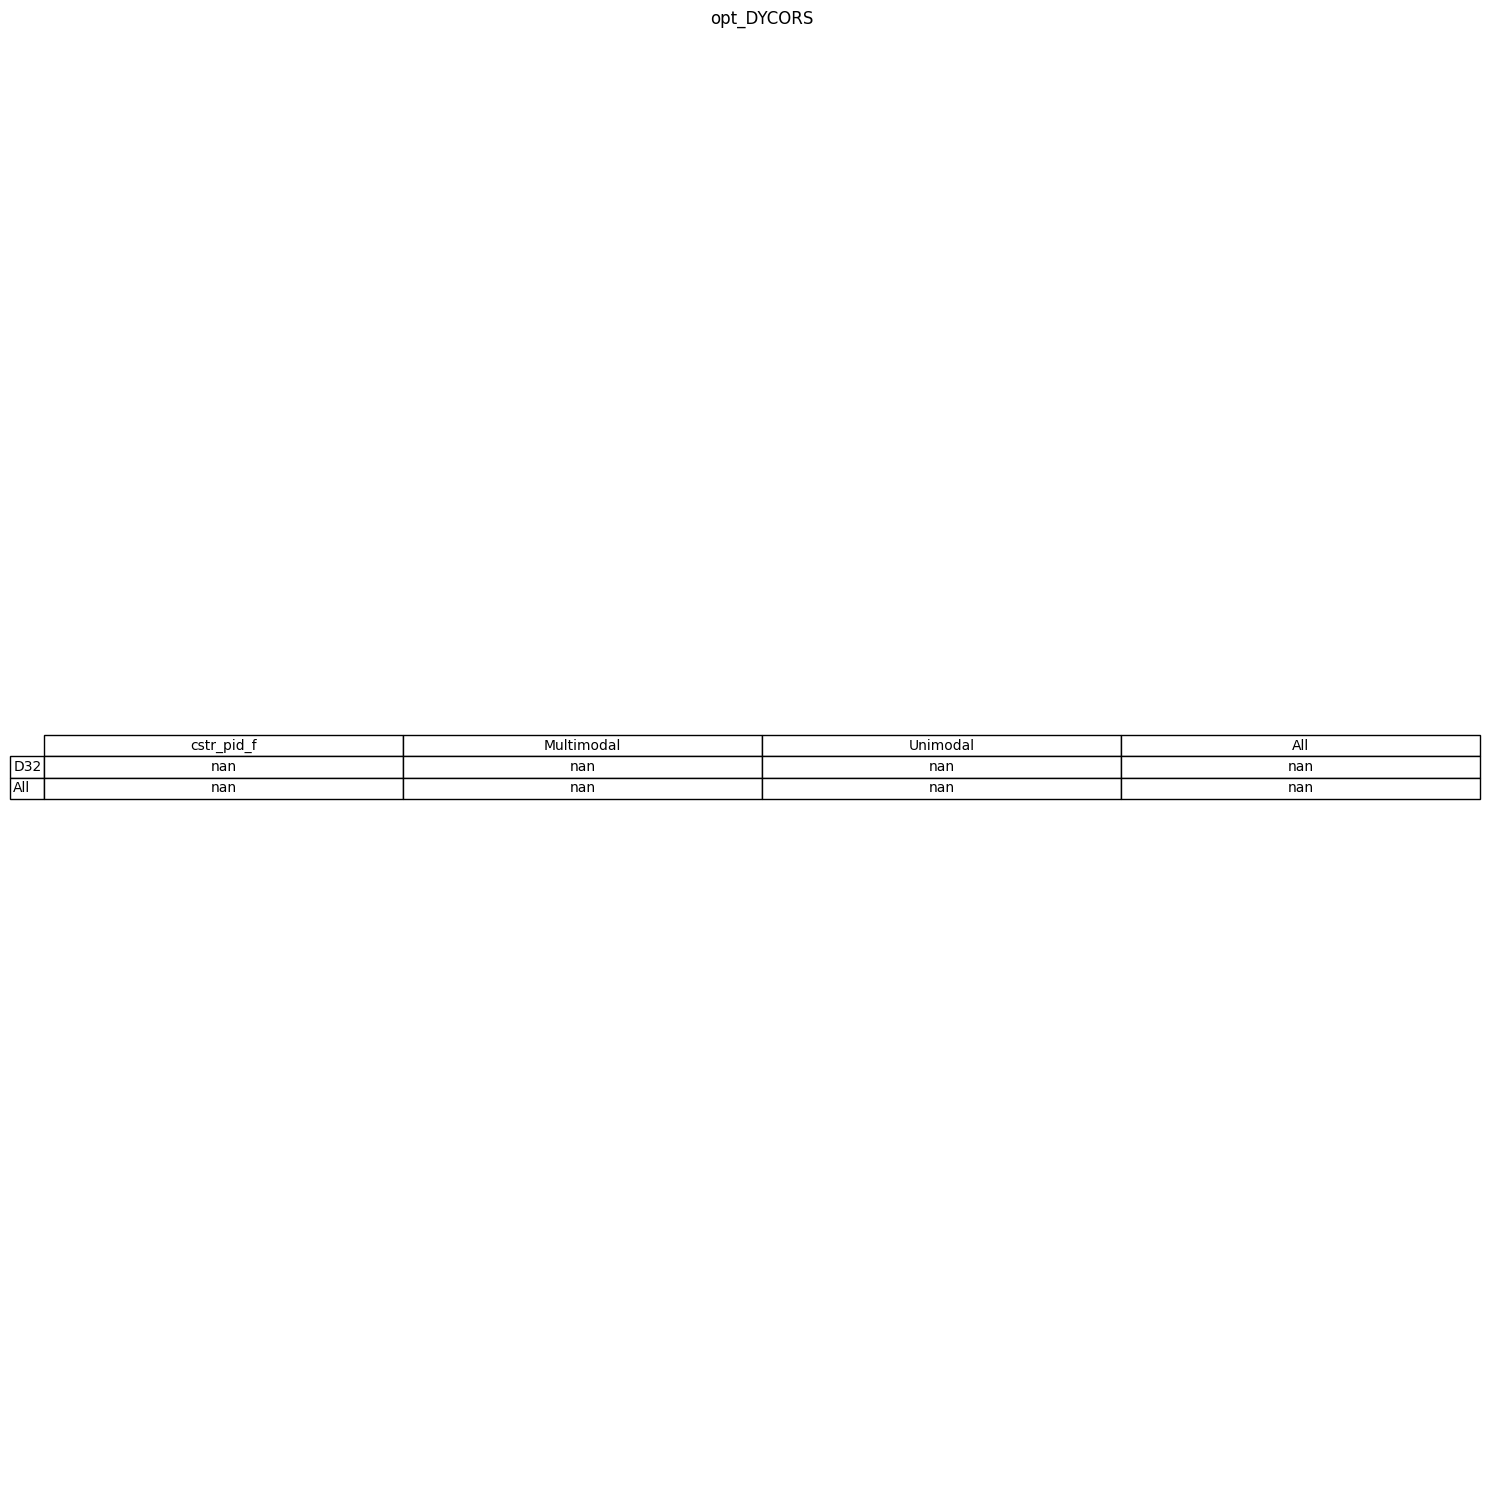

In [5]:
ML4CE_uncon_table_plot(
    array, functions_test, algorithms_test, N_x_l, home_dir, timestamp, SafeFig=False
)

### Plot graphs

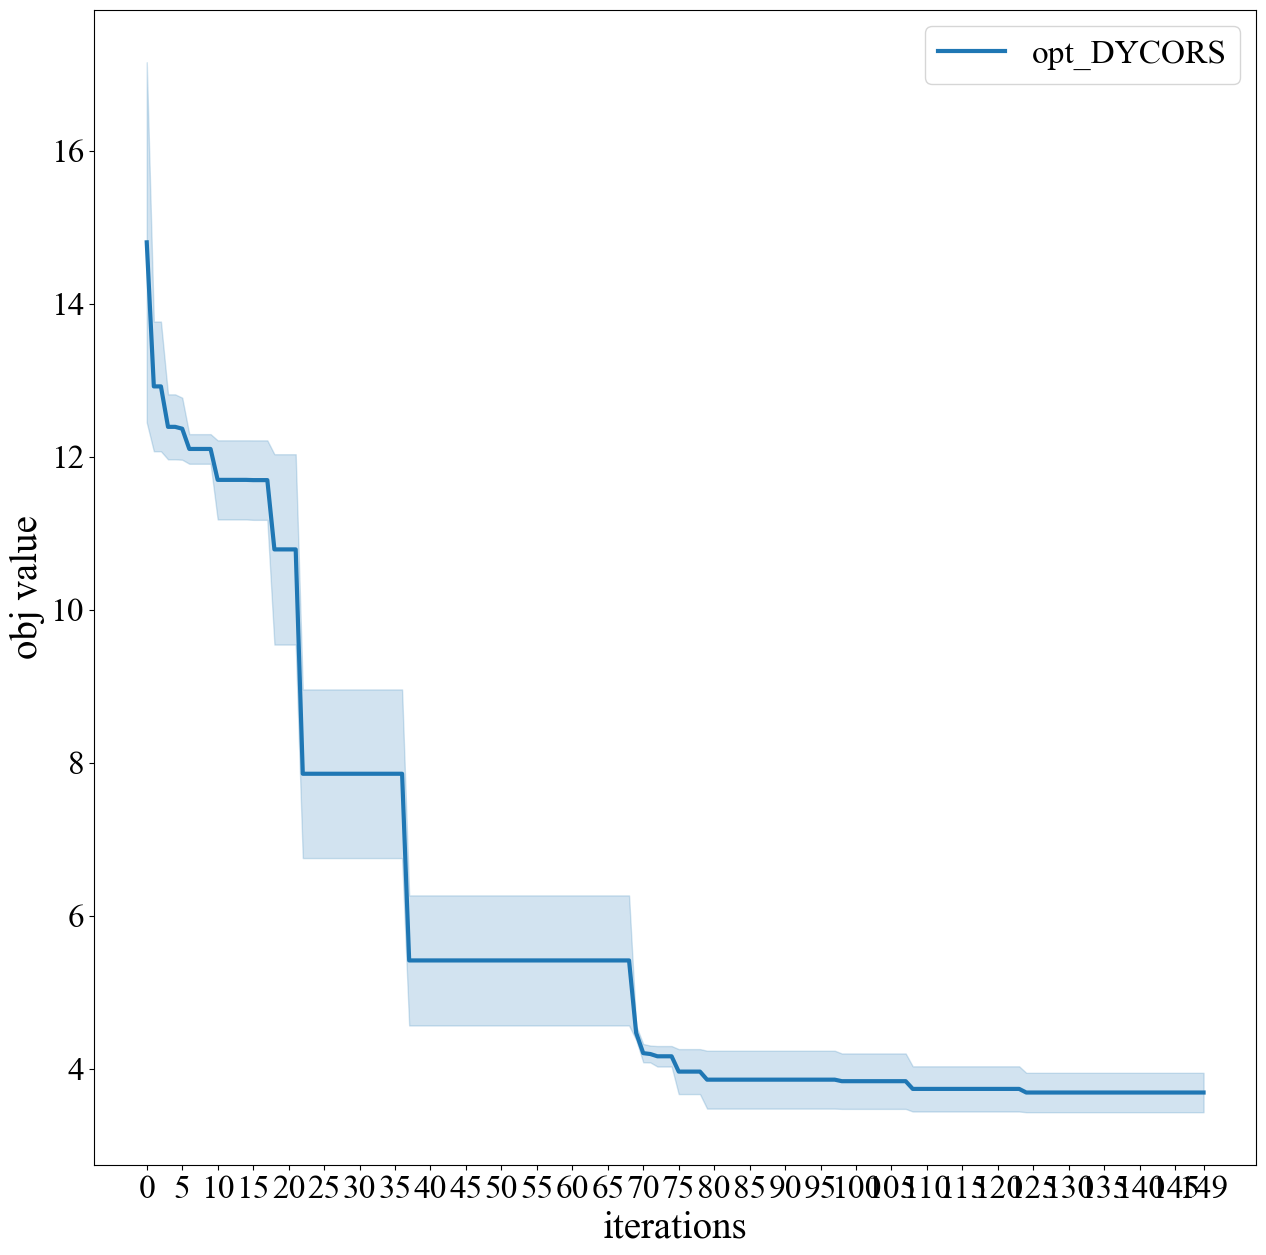

In [6]:
ML4CE_uncon_graph_abs(
    trajectories,
    algorithms_test,
    functions_test,
    N_x_l,
    home_dir,
    timestamp,
    SafeFig=False,
)